In [153]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [154]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


# Problem formulation

- Multi scatter plot
- Feature scoring
- Scenario discovery (PRIM)
- Dimensional stacking

In [155]:
experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,8,144.513300,1.5,0.561047,214.564739,10.0,0.808000,32.891691,1.0,0.803138,...,0,0,0,0,0,0,0,9000,policy 0,dikesnet
1,43,190.132777,10.0,0.497141,299.100122,1.0,0.896576,298.677160,1.0,0.850908,...,0,0,0,0,0,0,0,9001,policy 0,dikesnet
2,94,97.073765,1.5,0.300335,337.648085,10.0,0.746209,186.850496,1.0,0.853440,...,0,0,0,0,0,0,0,9002,policy 0,dikesnet
3,123,111.952992,10.0,0.637967,113.114623,1.0,0.810133,113.868838,1.0,0.858169,...,0,0,0,0,0,0,0,9003,policy 0,dikesnet
4,53,164.926792,10.0,0.635318,294.831196,10.0,0.703472,237.700937,10.0,0.893302,...,0,0,0,0,0,0,0,9004,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,77,225.129593,1.5,0.413980,252.253576,10.0,0.719931,291.537524,1.0,0.060407,...,0,0,0,0,0,0,0,13995,policy 0,dikesnet
4996,128,148.398998,1.0,0.630517,258.160307,10.0,0.591347,129.481371,1.5,0.777331,...,0,0,0,0,0,0,0,13996,policy 0,dikesnet
4997,112,94.401179,1.0,0.598193,299.724845,1.0,0.990399,188.477864,10.0,0.677312,...,0,0,0,0,0,0,0,13997,policy 0,dikesnet
4998,51,314.286960,1.0,0.515598,230.922151,1.5,0.662691,165.943039,10.0,0.746852,...,0,0,0,0,0,0,0,13998,policy 0,dikesnet


In [156]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,8.731065e+08,0,0.0,0.0,0.904528,policy 0
1,3.737378e+08,0,0.0,0.0,0.238125,policy 0
2,2.686783e+09,0,0.0,0.0,1.553294,policy 0
3,1.863891e+08,0,0.0,0.0,0.226572,policy 0
4,1.585577e+08,0,0.0,0.0,0.126337,policy 0
...,...,...,...,...,...,...
4995,2.203876e+09,0,0.0,0.0,3.367279,policy 0
4996,1.887812e+08,0,0.0,0.0,0.224633,policy 0
4997,2.112066e+08,0,0.0,0.0,0.210737,policy 0
4998,2.967097e+08,0,0.0,0.0,0.176772,policy 0


# Multiscatter plot

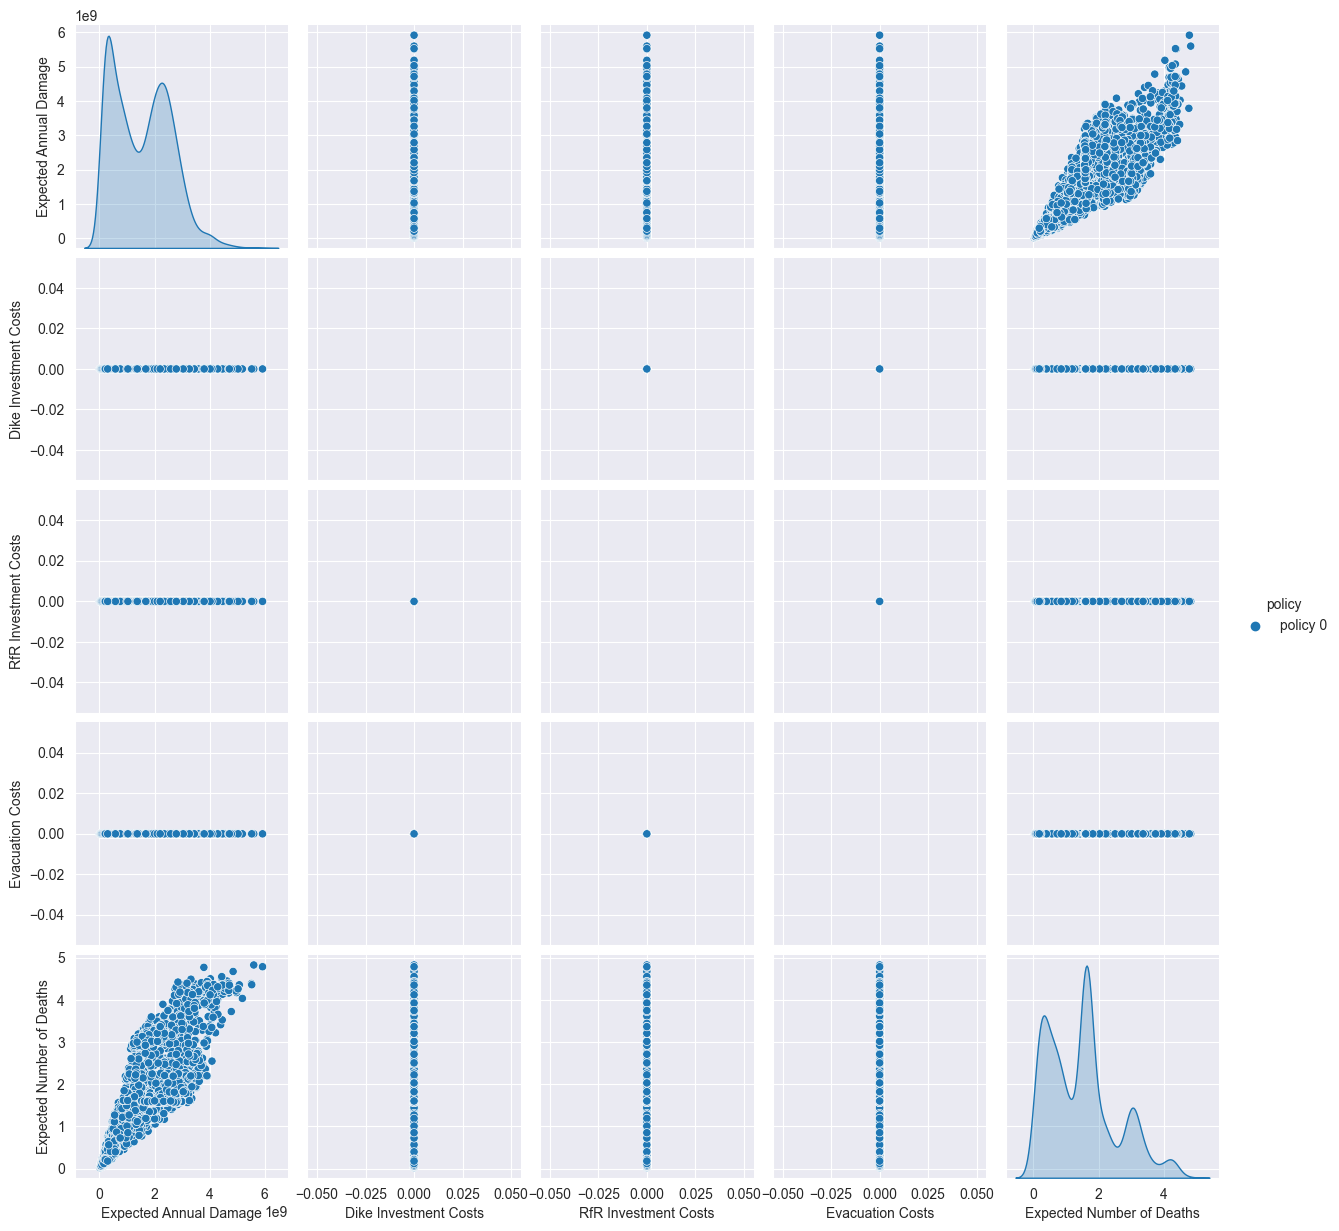

In [157]:
sns.pairplot(outcomes, hue='policy')
plt.show()

Explanation!

# Feature scoring

In [158]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,4.5,3.5,8,144.513300,0.561047,1.5,214.564739,0.808000,10.0,32.891691,0.803138,1.0,205.230671,0.358284,1.0,68.307202,0.043287,10.0
1,4.5,3.5,1.5,43,190.132777,0.497141,10.0,299.100122,0.896576,1.0,298.677160,0.850908,1.0,42.251392,0.005298,10.0,136.426342,0.791947,1.5
2,2.5,2.5,1.5,94,97.073765,0.300335,1.5,337.648085,0.746209,10.0,186.850496,0.853440,1.0,57.420089,0.632989,1.0,87.253210,0.511483,1.0
3,1.5,4.5,4.5,123,111.952992,0.637967,10.0,113.114623,0.810133,1.0,113.868838,0.858169,1.0,114.560549,0.464606,1.5,307.991060,0.744899,1.0
4,4.5,1.5,1.5,53,164.926792,0.635318,10.0,294.831196,0.703472,10.0,237.700937,0.893302,10.0,124.834977,0.589578,10.0,247.638462,0.706222,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.5,1.5,4.5,77,225.129593,0.413980,1.5,252.253576,0.719931,10.0,291.537524,0.060407,1.0,340.159831,0.519472,1.0,151.996450,0.850361,1.0
4996,4.5,2.5,3.5,128,148.398998,0.630517,1.0,258.160307,0.591347,10.0,129.481371,0.777331,1.5,69.813905,0.755774,10.0,196.850906,0.535369,1.0
4997,1.5,4.5,1.5,112,94.401179,0.598193,1.0,299.724845,0.990399,1.0,188.477864,0.677312,10.0,223.882450,0.946300,10.0,202.823067,0.942108,10.0
4998,4.5,2.5,1.5,51,314.286960,0.515598,1.0,230.922151,0.662691,1.5,165.943039,0.746852,10.0,308.783759,0.031802,1.0,242.278958,0.081661,1.5


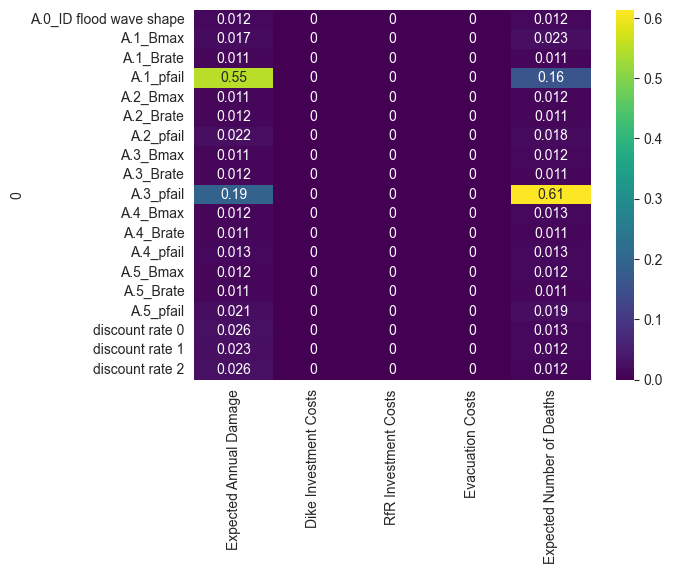

In [159]:
from ema_workbench.analysis import feature_scoring

fs = feature_scoring.get_feature_scores_all(uncertainty_experiments, outcomes.drop(columns='policy'))
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

Explanation!

# PRIM

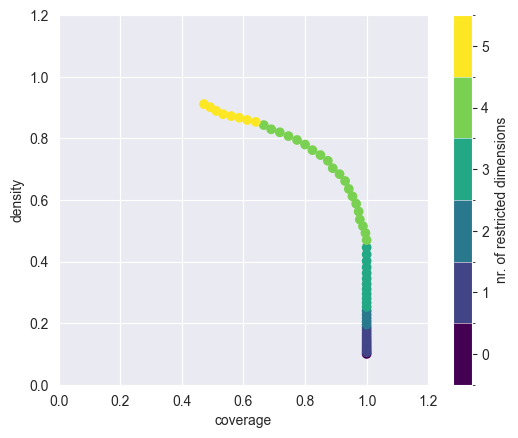

In [160]:
from ema_workbench.analysis import prim

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths']< np.percentile(outcomes['Expected Number of Deaths'],10) #
# WE MOETEN EEN THRESHOLD NOG KIEZEN!

prim_alg = prim.Prim(x, y, threshold=0.5)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()


coverage     1.000000
density      0.279955
id          20.000000
mass         0.357200
mean         0.279955
res_dim      3.000000
Name: 20, dtype: float64

             box 20                                 
                min       max      qp value qp value
A.1_pfail  0.460360  0.999972  1.220635e-42      NaN
A.2_pfail  0.231396  0.999836  4.877877e-10      NaN
A.3_pfail  0.151491  0.999931  4.945728e-05      NaN



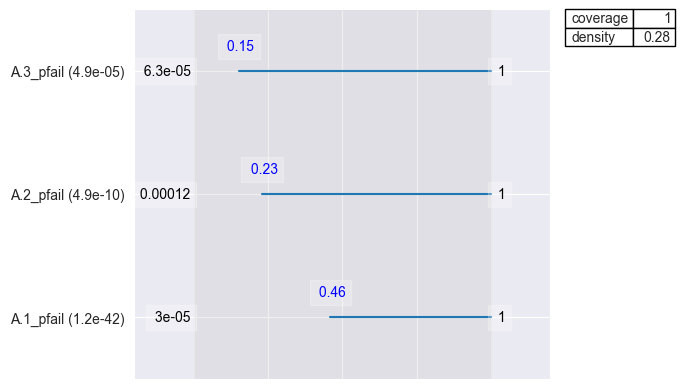

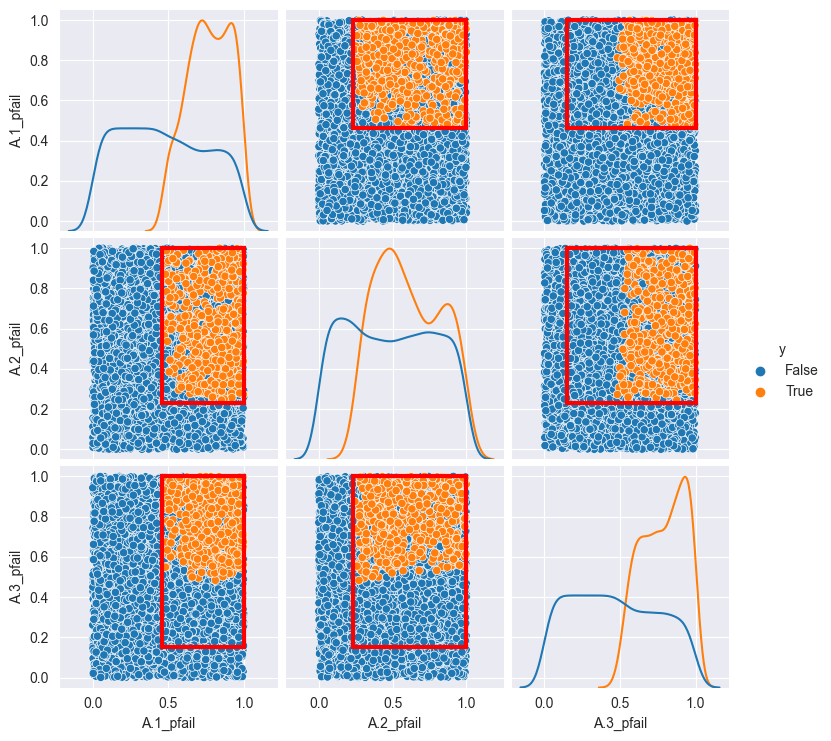

In [161]:
box1.inspect(20)
box1.inspect(20, style="graph")
box1.show_pairs_scatter(20)
plt.show()

# Dimensional stacking

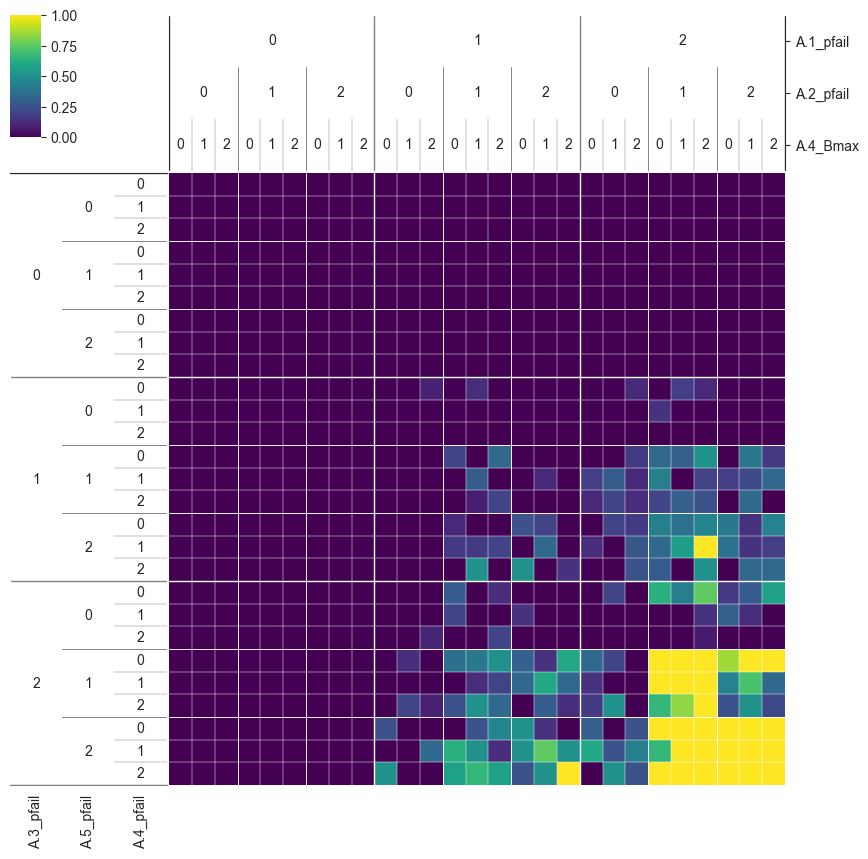

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [165]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'].values < np.percentile(outcomes['Expected Number of Deaths'],10)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()